<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
    <b>CAPSTONE</b><br/><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/><br/>
    <b>GRUPO 3 - Modeling</b><br/><br/>
    <b>H1N1 - Split 80%-20% - Important Variables</b>  
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opiniones y comportamientos a nivel salud.

Después de la fase de EDA (Exploratory Data Analysis), nos quedamos con 32 de las 36 características iniciales:

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.

# 1. Preparación

En esta fase vamos a cargar y preparar el dataset resultante de la fase de EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.style.use('ggplot')

RANDOM_SEED = 42    # Set a random seed for reproducibility!

In [173]:
def print_metrics(y_test, y_pred_result):
  print("Accuracy:", "{:10.4f}".format(accuracy_score(y_test, y_pred_result, normalize=True)))
  print("Precision:", "{:10.4f}".format(precision_score(y_test, y_pred_result)))
  print("Recall:", "{:10.4f}".format(recall_score(y_test, y_pred_result)))
  print("\n", classification_report(y_test, y_pred_result))

In [174]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
)

In [175]:
def important_variables(X_train, feature_importances):
    data = {'names': X_train.columns, 'important': feature_importances}
    important_vars = pd.DataFrame(data)
    
    z = ggplot(aes(x ="names", y="important", fill="important"),
               important_vars.sort_values("important",ascending=0).head(20)) + geom_bar(stat ="identity",position ="stack") + coord_flip()
    c = important_vars.sort_values("important",ascending=0).head(20)
    print(z)
    print(c)

Cargamos el dataset y exploramos su estructura y datos.

In [338]:
features_df = pd.read_csv('training_set_features_eda_notnulls.csv', index_col="respondent_id")
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


El dataset tiene 26707 filas y 48 columnas.

In [339]:
features_df.shape

(26707, 48)

Tipos de datos por columna:

In [340]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
age_group_0                    float64
age_group_1                    float64
age_group_2              

In [341]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,0.560265,0.439735,0.777998,0.222002,0.562512,0.383083,0.054405,0.436028,0.294455,0.269517
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,0.496364,0.496364,0.415600,0.415600,0.496086,0.486147,0.226820,0.495900,0.455806,0.443717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [342]:
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Split training y evaluation set

In [343]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.20,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
y_train_seasonal = y_train[['seasonal_vaccine']].copy()
y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()

In [327]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'age_group_0' 'age_group_1' 'age_group_2'
 'age_group_3' 'age_group_4' 'education_0' 'education_1' 'education_2'
 'education_3' 'race_0' 'race_1' 'race_2' 'race_3' 'sex_0' 'sex_1'
 'marital_status_0' 'marital_status_1' 'rent_or_own_0' 'rent_or_own_1'
 'employment_status_0' 'employment_status_1' 'employment_status_2'
 'census_msa_0' 'census_msa_1' 'census_msa_2']


In [328]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [184]:
def subset_df(split_pct, features_df, labels_df, is_h1n1):
    X_train, X_eval, y_train, y_eval = train_test_split(
        features_df,
        labels_df,
        test_size=split_pct,
        shuffle=True,
        stratify=labels_df,
        random_state=RANDOM_SEED
    )

    y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
    y_train_seasonal = y_train[['seasonal_vaccine']].copy()
    y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
    y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()
    
    if is_h1n1 == True:
        return [X_train, X_eval, y_train, y_eval_h1n1]
    else:
        return [X_train, X_eval, y_train, y_eval_seasonal]

In [220]:
def reset_df():
    X_train, X_eval, y_train, y_eval = train_test_split(
        features_df,
        labels_df,
        test_size=0.20,
        shuffle=True,
        stratify=labels_df,
        random_state=RANDOM_SEED
    )

    y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
    y_train_seasonal = y_train[['seasonal_vaccine']].copy()
    y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
    y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()

# 2. Hyperparameters tuning & Training

In [185]:
params_result = pd.DataFrame()

## Naive Bayes

### Tuning H1N1

In [186]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

start_time = time.time()

naive_h1n1_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

end_time_tuning = f"{time.time() - start_time:.2f}"

print(naive_h1n1_grid.best_estimator_)
print("--- NB tuning: %s seconds ---" % end_time_tuning)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02848035868435802)
--- NB tuning: 4.17 seconds ---


### Training H1N1

In [187]:
estimator_nb_h1n1 = GaussianNB(var_smoothing=0.02848035868435802)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_nb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [188]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- NB training: %s seconds ---" % end_time_training)

# Predict on evaluation set
preds_nb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_nb_h1n1

--- NB training: 0.08 seconds ---


array([[9.99043480e-01, 9.56520485e-04],
       [2.12525850e-02, 9.78747415e-01],
       [9.98976666e-01, 1.02333420e-03],
       ...,
       [9.99872732e-01, 1.27267721e-04],
       [9.03577852e-01, 9.64221476e-02],
       [5.48117171e-02, 9.45188283e-01]])

In [189]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_nb_h1n1[:, 1].round())

Accuracy:     0.7812
Precision:     0.4886
Recall:     0.6396

               precision    recall  f1-score   support

           0       0.89      0.82      0.86      4207
           1       0.49      0.64      0.55      1135

    accuracy                           0.78      5342
   macro avg       0.69      0.73      0.70      5342
weighted avg       0.81      0.78      0.79      5342



In [190]:
nb_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_nb_h1n1[:, 1]):.6f}"
print(f"AUC = {nb_h1n1_auc}")

AUC = 0.805387


In [191]:
y_preds_nb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_nb_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_nb_h1n1.shape)
y_preds_nb_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.000957
1215,0.978747
10540,0.001023
7407,0.000052
14697,0.002279


In [192]:
nb_params_result = pd.DataFrame({'estimator':'nb','target':'h1n1',
                                 'params':naive_h1n1_grid.best_params_,
                                 'grid score':naive_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':nb_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced': 'False'})
params_result = pd.concat([params_result, nb_params_result])
nb_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
var_smoothing,nb,h1n1,0.02848,0.810459,4.17,0.805387,0.08,False


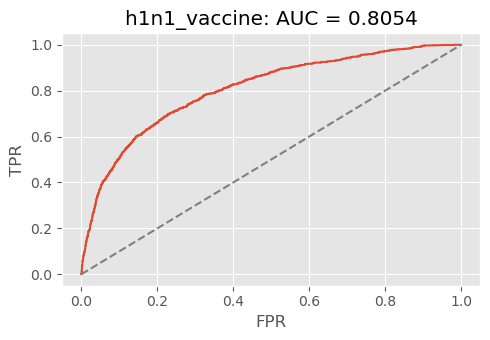

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_nb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3447  760]
 [ 409  726]]


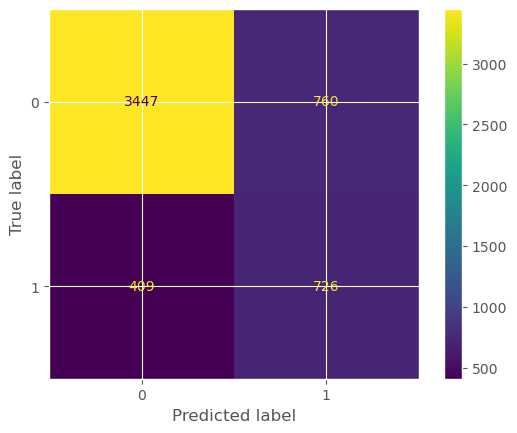

In [194]:
cm = confusion_matrix(y_eval_h1n1, preds_nb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_nb_h1n1.classes_)
disp.plot()
plt.show()

## Logistic Regression

### Tuning H1N1

In [195]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ["lbfgs", "sag", "saga"],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

start_time = time.time()

lr = LogisticRegression()
lr_h1n1_grid = GridSearchCV(lr, param_grid, cv=10, scoring="roc_auc", verbose=1)
lr_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

end_time_tuning = f"{time.time() - start_time:.2f}"
print("--- LR tuning: %s seconds ---" % end_time_tuning)

print(lr_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
--- LR tuning: 501.22 seconds ---
LogisticRegression(C=0.2, multi_class='multinomial')


In [196]:
coefficients = lr_h1n1_grid.best_estimator_.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
9,doctor_recc_h1n1,0.997020
14,health_insurance,0.700399
13,health_worker,0.394081
15,opinion_h1n1_vacc_effective,0.282686
10,doctor_recc_seasonal,0.260704
16,opinion_h1n1_risk,0.208579
32,race_0,0.144267
12,child_under_6_months,0.135552
27,age_group_4,0.121430
4,behavioral_face_mask,0.116602


<AxesSubplot:ylabel='Feature'>

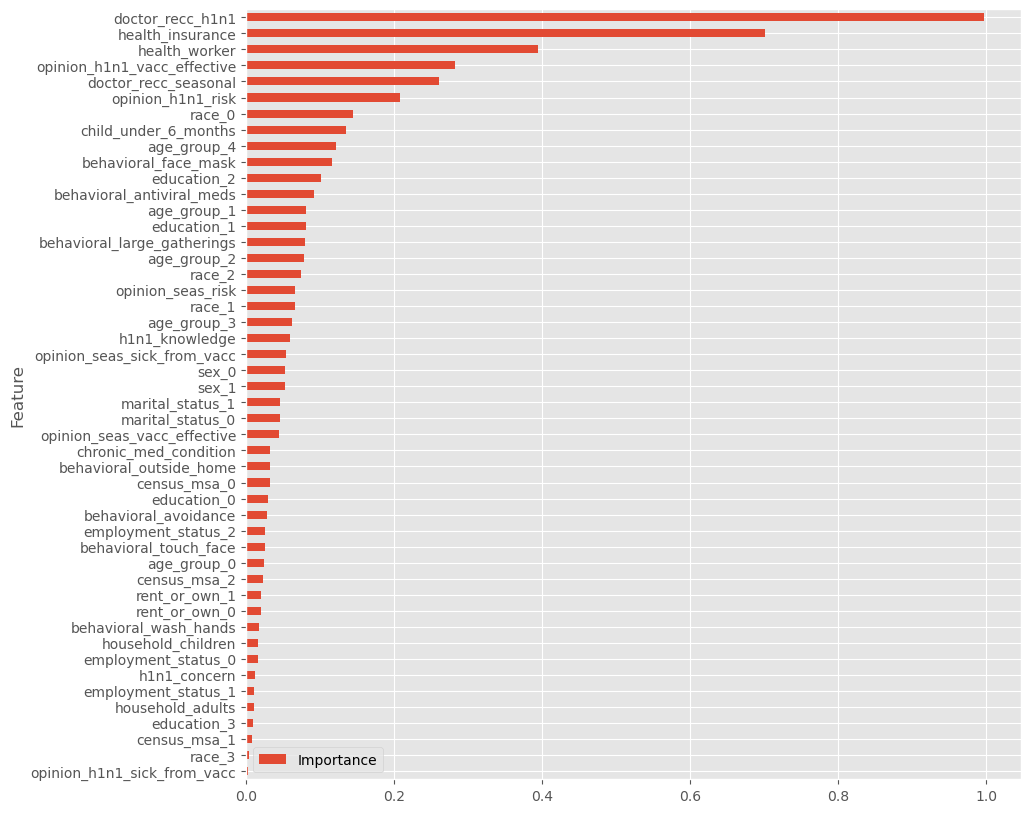

In [197]:
feature_importance.sort_values('Importance', ascending=True).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 10))

### Training H1N1

In [198]:
# We get important features with more of 5% of importance, 24 variables
h1n1_lr_features = features_df[['doctor_recc_h1n1','health_insurance','health_worker','opinion_h1n1_vacc_effective',
                                'doctor_recc_seasonal','opinion_h1n1_risk','race_0','child_under_6_months','age_group_4',
                                'behavioral_face_mask','education_2','behavioral_antiviral_meds','age_group_1',
                                'education_1','behavioral_large_gatherings','age_group_2','race_2','opinion_seas_risk',
                                'race_1','age_group_3','h1n1_knowledge','opinion_seas_sick_from_vacc','sex_0','sex_1']].copy()

[X_train, X_eval, y_train, y_eval_h1n1] = subset_df(0.20, h1n1_lr_features, labels_df, True)
h1n1_lr_features.shape

(26707, 24)

In [199]:
numeric_cols = h1n1_lr_features.columns[h1n1_lr_features.dtypes != "object"].values
print(numeric_cols)

['doctor_recc_h1n1' 'health_insurance' 'health_worker'
 'opinion_h1n1_vacc_effective' 'doctor_recc_seasonal' 'opinion_h1n1_risk'
 'race_0' 'child_under_6_months' 'age_group_4' 'behavioral_face_mask'
 'education_2' 'behavioral_antiviral_meds' 'age_group_1' 'education_1'
 'behavioral_large_gatherings' 'age_group_2' 'race_2' 'opinion_seas_risk'
 'race_1' 'age_group_3' 'h1n1_knowledge' 'opinion_seas_sick_from_vacc'
 'sex_0' 'sex_1']


In [200]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [201]:
estimator_lr_h1n1 = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial', penalty='l2')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_lr_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['doctor_recc_h1n1', 'health_insurance', 'health_worker',
       'opinion_h1n1_vacc_effective', 'doctor_recc_seasonal',
       'opinion_h1n1_risk', 'race_0', 'child_under_6_months',
       'age_group_4', 'behavioral_face_mask', 'education_2',
       'behavioral_antiviral_meds', 'age_group_1', 'education_1',
       'behavioral_large_gatherings', 'age_group_2', 'race_2',
       'opinion_seas_risk', 'race_1', 'age_group_3', 'h1n1_knowledge',
       'opinion_seas_sick_from_vacc', 'sex_0',

In [202]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- LR training: %s seconds ---" % end_time_training)

# Predict on evaluation set
preds_lr_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lr_h1n1

--- LR training: 0.08 seconds ---


array([[0.98924899, 0.01075101],
       [0.52191015, 0.47808985],
       [0.90694159, 0.09305841],
       ...,
       [0.97366164, 0.02633836],
       [0.79374351, 0.20625649],
       [0.58365921, 0.41634079]])

In [203]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_h1n1[:, 1].round())

Accuracy:     0.8437
Precision:     0.6943
Recall:     0.4722

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      4207
           1       0.69      0.47      0.56      1135

    accuracy                           0.84      5342
   macro avg       0.78      0.71      0.73      5342
weighted avg       0.83      0.84      0.83      5342



In [204]:
lr_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_lr_h1n1[:, 1]):.6f}"
print(f"AUC = {lr_h1n1_auc}")

AUC = 0.857890


In [205]:
y_preds_lr_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lr_h1n1.shape)
y_preds_lr_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.010751
1215,0.478090
10540,0.093058
7407,0.185568
14697,0.159301


In [206]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'h1n1',
                                 'params':lr_h1n1_grid.best_params_,
                                 'grid score':lr_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':lr_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced':'False'})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
C,lr,h1n1,0.2,0.852966,501.22,0.857890,0.08,False
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857890,0.08,False
penalty,lr,h1n1,l2,0.852966,501.22,0.857890,0.08,False
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857890,0.08,False


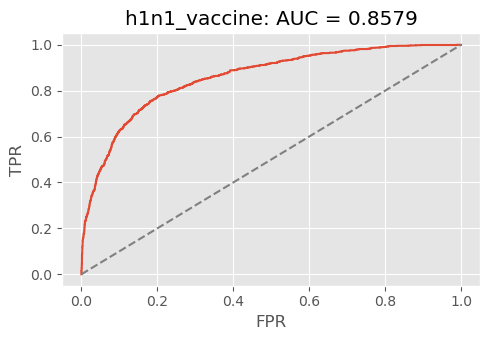

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3971  236]
 [ 599  536]]


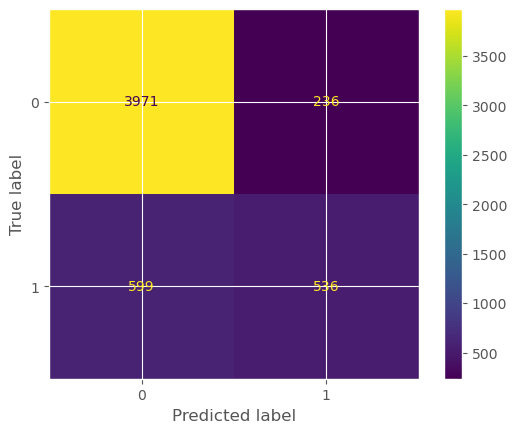

In [208]:
cm = confusion_matrix(y_eval_h1n1, preds_lr_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_lr_h1n1.classes_)
disp.plot()
plt.show()

### Training H1N1 Balanced

In [209]:
estimator_lrb_h1n1 = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial', penalty='l2',
                                        class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_lrb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['doctor_recc_h1n1', 'health_insurance', 'health_worker',
       'opinion_h1n1_vacc_effective', 'doctor_recc_seasonal',
       'opinion_h1n1_risk', 'race_0', 'child_under_6_months',
       'a...l_face_mask', 'education_2',
       'behavioral_antiviral_meds', 'age_group_1', 'education_1',
       'behavioral_large_gatherings', 'age_group_2', 'race_2',
       'opinion_seas_risk', 'race_1', 'age_group_3', 'h1n1_knowledge',
       'opinion_seas_sick_from_vacc', 'sex_0', 'sex_1'], dtype=obj

In [210]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- LR training: %s seconds ---" % end_time_training)

# Predict on evaluation set
preds_lrb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lrb_h1n1

--- LR training: 0.08 seconds ---


array([[0.95883652, 0.04116348],
       [0.22825007, 0.77174993],
       [0.7372894 , 0.2627106 ],
       ...,
       [0.90511239, 0.09488761],
       [0.51949787, 0.48050213],
       [0.26283632, 0.73716368]])

In [211]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lrb_h1n1[:, 1].round())

Accuracy:     0.7930
Precision:     0.5085
Recall:     0.7674

               precision    recall  f1-score   support

           0       0.93      0.80      0.86      4207
           1       0.51      0.77      0.61      1135

    accuracy                           0.79      5342
   macro avg       0.72      0.78      0.74      5342
weighted avg       0.84      0.79      0.81      5342



In [212]:
lrb_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_lrb_h1n1[:, 1]):.6f}"
print(f"AUC = {lrb_h1n1_auc}")

AUC = 0.857976


In [213]:
y_preds_lrb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lrb_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lrb_h1n1.shape)
y_preds_lrb_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.041163
1215,0.771750
10540,0.262711
7407,0.485513
14697,0.396369


In [214]:
lrb_params_result = pd.DataFrame({'estimator':'lr','target':'h1n1',
                                 'params':lr_h1n1_grid.best_params_,
                                 'grid score':lr_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':lrb_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced': 'True'})
params_result = pd.concat([params_result, lrb_params_result])
lrb_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
C,lr,h1n1,0.2,0.852966,501.22,0.857976,0.08,True
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857976,0.08,True
penalty,lr,h1n1,l2,0.852966,501.22,0.857976,0.08,True
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857976,0.08,True


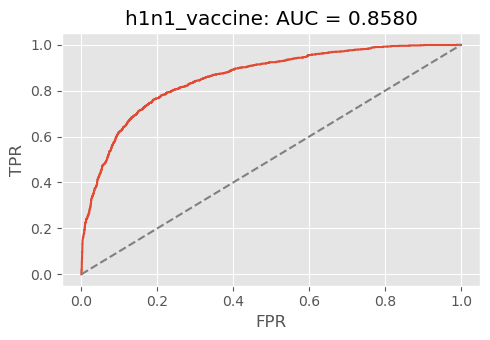

In [215]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lrb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3365  842]
 [ 264  871]]


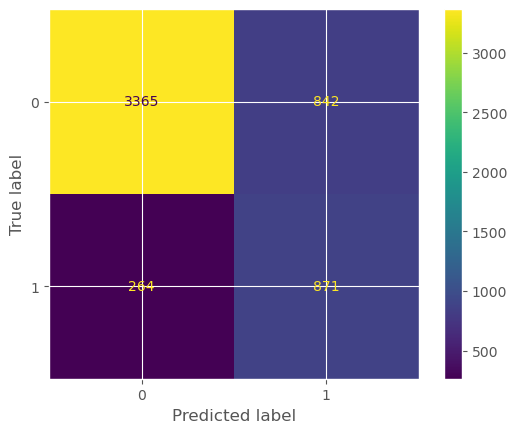

In [216]:
cm = confusion_matrix(y_eval_h1n1, preds_lrb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_lrb_h1n1.classes_)
disp.plot()
plt.show()

In [217]:
params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
var_smoothing,nb,h1n1,0.02848,0.810459,4.17,0.805387,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857890,0.08,False
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857890,0.08,False
penalty,lr,h1n1,l2,0.852966,501.22,0.857890,0.08,False
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857890,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857976,0.08,True
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857976,0.08,True
penalty,lr,h1n1,l2,0.852966,501.22,0.857976,0.08,True
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857976,0.08,True


## SVM

### Tuning H1N1

In [221]:
reset_df()

In [222]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

start_time = time.time()

svm_h1n1_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_h1n1_grid.fit(X_train, y_train_h1n1)

end_time_tuning = f"{time.time() - start_time:.2f}"
print("--- SVM tuning: %s seconds ---" % end_time_tuning)

# print best parameter after tuning
print(svm_h1n1_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_h1n1_grid.best_estimator_)

# print best_score after hyper-parameter tuning
print(svm_h1n1_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=  38.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=  37.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=  37.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=  37.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.807 total time=  37.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=  10.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=  10.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=  10.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.817 total time=  10.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=  11.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.852 total time=  11.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

### Training SVM

In [243]:
estimator_svm_h1n1 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svm_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [244]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- SVM training: %s seconds ---" % end_time_training)

# Predict on evaluation set
preds_svm_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svm_h1n1

--- SVM training: 90.38 seconds ---


array([[0.951832  , 0.048168  ],
       [0.64142058, 0.35857942],
       [0.90274138, 0.09725862],
       ...,
       [0.91017449, 0.08982551],
       [0.85850494, 0.14149506],
       [0.70020885, 0.29979115]])

In [245]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svm_h1n1[:, 1].round())

Accuracy:     0.8491
Precision:     0.7394
Recall:     0.4476

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4207
           1       0.74      0.45      0.56      1135

    accuracy                           0.85      5342
   macro avg       0.80      0.70      0.73      5342
weighted avg       0.84      0.85      0.83      5342



In [247]:
svm_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_svm_h1n1[:, 1]):.6f}"
print(f"AUC = {svm_h1n1_auc}")

AUC = 0.847213


In [248]:
y_preds_svm_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svm_h1n1.shape)
y_preds_svm_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.048168
1215,0.358579
10540,0.097259
7407,0.134303
14697,0.126597


In [249]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'h1n1',
                                 'params':svm_h1n1_grid.best_params_,
                                 'grid score':svm_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':svm_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced':'False'})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
C,svm,h1n1,1,0.848509,1032.88,0.847213,90.38,False
gamma,svm,h1n1,0.01,0.848509,1032.88,0.847213,90.38,False
kernel,svm,h1n1,rbf,0.848509,1032.88,0.847213,90.38,False


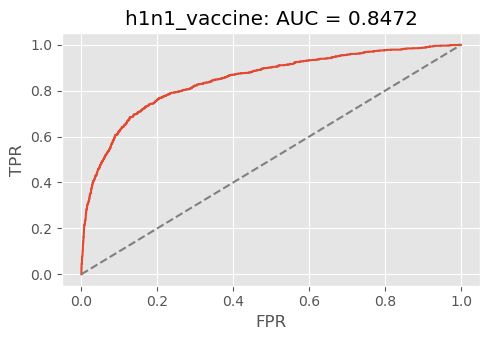

In [250]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[4028  179]
 [ 627  508]]


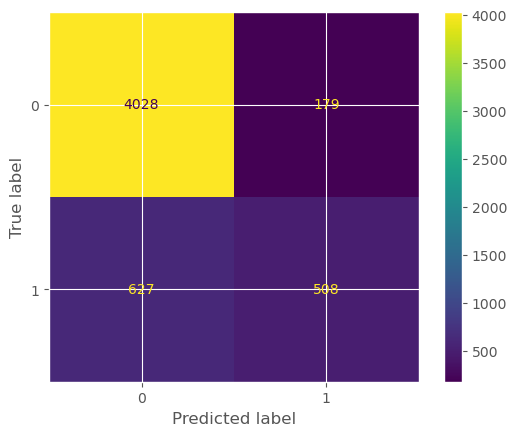

In [251]:
cm = confusion_matrix(y_eval_h1n1, preds_svm_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svm_h1n1.classes_)
disp.plot()
plt.show()

### Training SVM Balanced

In [252]:
estimator_svmb_h1n1 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svmb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [253]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- SVM training: %s seconds ---" % end_time_training)

# Predict on evaluation set
preds_svmb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svmb_h1n1

--- SVM training: 136.46 seconds ---


array([[0.98261539, 0.01738461],
       [0.5       , 0.5       ],
       [0.92809138, 0.07190862],
       ...,
       [0.96598956, 0.03401044],
       [0.78468706, 0.21531294],
       [0.5       , 0.5       ]])

In [401]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svmb_h1n1[:, 1].round())

Accuracy:     0.8474
Precision:     0.6961
Recall:     0.5004

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4207
           1       0.70      0.50      0.58      1135

    accuracy                           0.85      5342
   macro avg       0.79      0.72      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [256]:
svmb_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_svmb_h1n1[:, 1]):.6f}"
print(f"AUC = {svmb_h1n1_auc}")

AUC = 0.862752


In [257]:
y_preds_svmb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svmb_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svmb_h1n1.shape)
y_preds_svmb_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.017385
1215,0.500000
10540,0.071909
7407,0.121695
14697,0.130853


In [258]:
svmb_params_result = pd.DataFrame({'estimator':'svm','target':'h1n1',
                                 'params':svm_h1n1_grid.best_params_,
                                 'grid score':svm_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':svmb_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced':'True'})
params_result = pd.concat([params_result, svmb_params_result])
svmb_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
C,svm,h1n1,1,0.848509,1032.88,0.862752,136.46,True
gamma,svm,h1n1,0.01,0.848509,1032.88,0.862752,136.46,True
kernel,svm,h1n1,rbf,0.848509,1032.88,0.862752,136.46,True


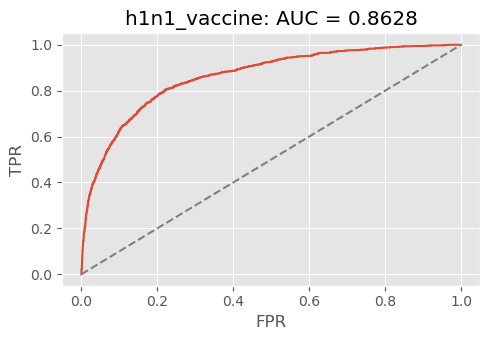

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svmb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3959  248]
 [ 567  568]]


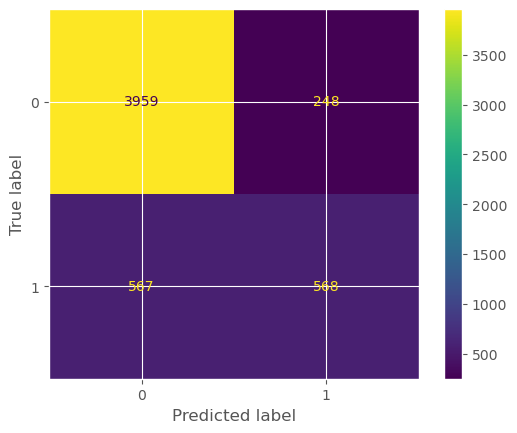

In [260]:
cm = confusion_matrix(y_eval_h1n1, preds_svmb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svmb_h1n1.classes_)
disp.plot()
plt.show()

In [261]:
params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
var_smoothing,nb,h1n1,0.02848,0.810459,4.17,0.805387,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857890,0.08,False
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857890,0.08,False
penalty,lr,h1n1,l2,0.852966,501.22,0.857890,0.08,False
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857890,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857976,0.08,True
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857976,0.08,True
penalty,lr,h1n1,l2,0.852966,501.22,0.857976,0.08,True
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857976,0.08,True
C,svm,h1n1,1,0.848509,1032.88,0.847213,90.38,False


## DecisionTreeClassifier

### Tuning H1N1

In [262]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

start_time = time.time()

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_h1n1_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_h1n1_grid.fit(X_train, y_train_h1n1)

end_time_tuning = f"{time.time() - start_time:.2f}"
print("--- LR tuning: %s seconds ---" % end_time_tuning)

print(dt_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
--- LR tuning: 2.89 seconds ---
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=42)


In [270]:
print(dt_h1n1_grid.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [264]:
coefficients = dt_h1n1_grid.best_estimator_.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
16,opinion_h1n1_risk,0.404267
9,doctor_recc_h1n1,0.243338
14,health_insurance,0.164532
10,doctor_recc_seasonal,0.074841
15,opinion_h1n1_vacc_effective,0.036058
19,opinion_seas_risk,0.019917
18,opinion_seas_vacc_effective,0.018872
13,health_worker,0.012637
17,opinion_h1n1_sick_from_vacc,0.010122
35,race_3,0.004012


<AxesSubplot:ylabel='Feature'>

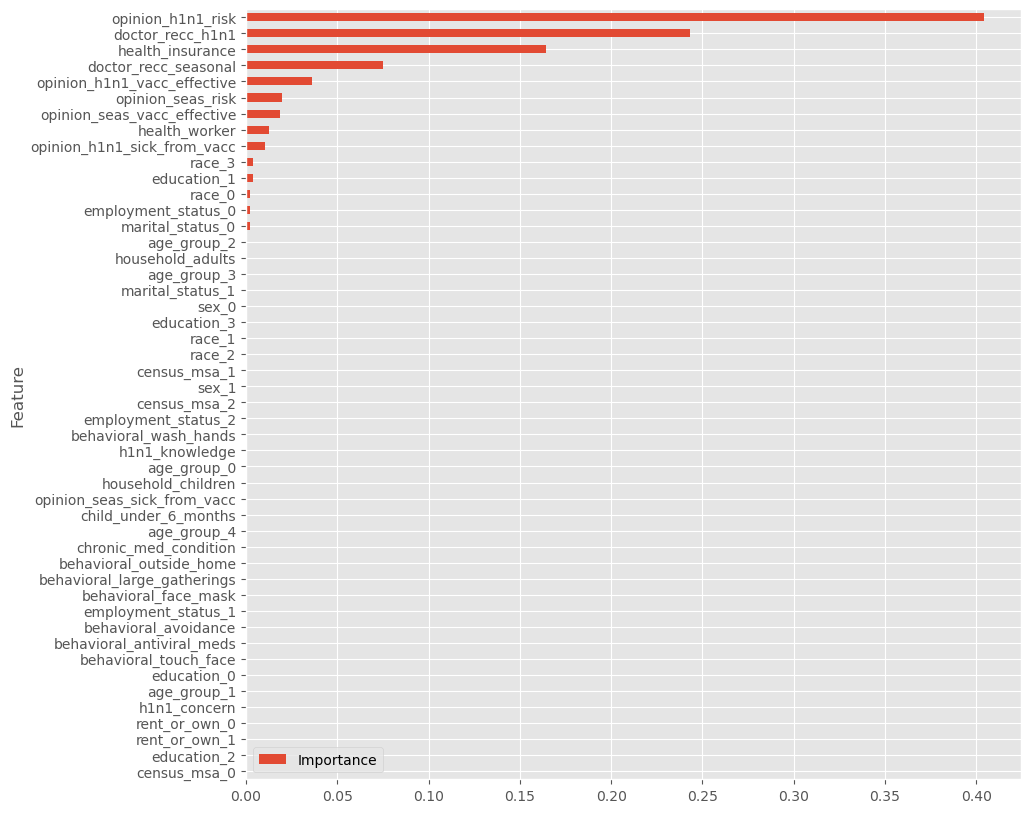

In [265]:
feature_importance.sort_values('Importance', ascending=True).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 10))

### Training H1N1

In [299]:
# We get important features, 16 variables
h1n1_dt_features = features_df[['opinion_h1n1_risk','doctor_recc_h1n1','health_insurance','doctor_recc_seasonal',
                                'opinion_h1n1_vacc_effective','opinion_seas_risk','opinion_seas_vacc_effective',
                                'health_worker','opinion_h1n1_sick_from_vacc','race_3','education_1','race_0',
                                'employment_status_0','marital_status_0','age_group_2','household_adults']].copy()

[X_train, X_eval, y_train, y_eval_h1n1] = subset_df(0.20, h1n1_dt_features, labels_df, True)
h1n1_dt_features.shape

(26707, 16)

In [300]:
numeric_cols = h1n1_dt_features.columns[h1n1_dt_features.dtypes != "object"].values
print(numeric_cols)

['opinion_h1n1_risk' 'doctor_recc_h1n1' 'health_insurance'
 'doctor_recc_seasonal' 'opinion_h1n1_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_vacc_effective' 'health_worker'
 'opinion_h1n1_sick_from_vacc' 'race_3' 'education_1' 'race_0'
 'employment_status_0' 'marital_status_0' 'age_group_2' 'household_adults']


In [301]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [302]:
estimator_dt_h1n1 = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8, 
                                           max_features='auto', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_dt_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['opinion_h1n1_risk', 'doctor_recc_h1n1', 'health_insurance',
       'doctor_recc_seasonal', 'opinion_h1n1_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_vacc_effective',
       'health_worker', 'opinion_h1n1_sick_from_vacc', 'race_3',
       'education_1', 'race_0', 'employment_status_0', 'marital_status_0',
       'age_group_2', 'household_adults'], dtype=object))])),
                ('estimator',
                 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entrop

In [303]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- LR training: %s seconds ---" % end_time_training)

# Predict on evaluation set
preds_dt_h1n1 = full_pipeline.predict_proba(X_eval)
preds_dt_h1n1

--- LR training: 0.05 seconds ---


array([[0.9404381 , 0.0595619 ],
       [0.48427673, 0.51572327],
       [0.91198044, 0.08801956],
       ...,
       [0.9404381 , 0.0595619 ],
       [0.6553727 , 0.3446273 ],
       [0.75989446, 0.24010554]])

In [304]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_dt_h1n1[:, 1].round())

Accuracy:     0.8289
Precision:     0.6623
Recall:     0.3974

               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4207
           1       0.66      0.40      0.50      1135

    accuracy                           0.83      5342
   macro avg       0.76      0.67      0.70      5342
weighted avg       0.81      0.83      0.81      5342



In [305]:
dt_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_dt_h1n1[:, 1]):.6f}"
print(f"AUC = {dt_h1n1_auc}")

AUC = 0.820484


In [306]:
y_preds_dt_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_dt_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_dt_h1n1.shape)
y_preds_dt_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.059562
1215,0.515723
10540,0.088020
7407,0.344627
14697,0.344627


In [316]:
dt_params_result = pd.DataFrame({'estimator':'dt','target':'h1n1',
                                 'params':dt_h1n1_grid.best_params_,
                                 'grid score':dt_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':dt_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced':'False'})
params_result = pd.concat([params_result, dt_params_result])
dt_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
ccp_alpha,dt,h1n1,0.001,0.802019,2.89,0.820484,0.05,False
criterion,dt,h1n1,entropy,0.802019,2.89,0.820484,0.05,False
max_depth,dt,h1n1,8,0.802019,2.89,0.820484,0.05,False
max_features,dt,h1n1,auto,0.802019,2.89,0.820484,0.05,False


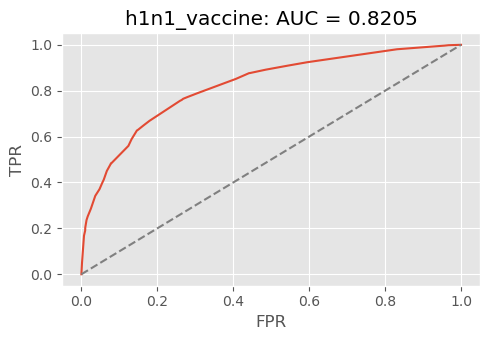

In [308]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_dt_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3977  230]
 [ 684  451]]


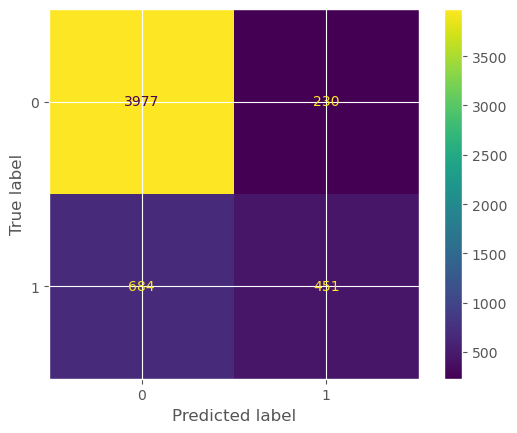

In [309]:
cm = confusion_matrix(y_eval_h1n1, preds_dt_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_dt_h1n1.classes_)
disp.plot()
plt.show()

In [317]:
params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
var_smoothing,nb,h1n1,0.02848,0.810459,4.17,0.805387,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857890,0.08,False
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857890,0.08,False
penalty,lr,h1n1,l2,0.852966,501.22,0.857890,0.08,False
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857890,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857976,0.08,True
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857976,0.08,True
penalty,lr,h1n1,l2,0.852966,501.22,0.857976,0.08,True
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857976,0.08,True
C,svm,h1n1,1,0.848509,1032.88,0.847213,90.38,False


## KNeighbors

### Tuning H1N1

In [318]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

start_time = time.time()

kn = KNeighborsClassifier()
kn_h1n1_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

end_time_tuning = f"{time.time() - start_time:.2f}"
print("--- KN tuning: %s seconds ---" % end_time_tuning)

print(kn_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
--- KN tuning: 58.60 seconds ---
KNeighborsClassifier(n_neighbors=30)


### Training H1N1

In [329]:
estimator_kn_h1n1 = KNeighborsClassifier(n_neighbors=30)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_kn_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [330]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- KN training: %s seconds ---" % end_time_training)

# Predict on evaluation set
preds_kn_h1n1 = full_pipeline.predict_proba(X_eval)
preds_kn_h1n1

--- KN training: 0.09 seconds ---


array([[1.        , 0.        ],
       [0.76666667, 0.23333333],
       [0.9       , 0.1       ],
       ...,
       [0.96666667, 0.03333333],
       [0.9       , 0.1       ],
       [0.63333333, 0.36666667]])

In [331]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_kn_h1n1[:, 1].round())

Accuracy:     0.8229
Precision:     0.7739
Recall:     0.2352

               precision    recall  f1-score   support

           0       0.83      0.98      0.90      4207
           1       0.77      0.24      0.36      1135

    accuracy                           0.82      5342
   macro avg       0.80      0.61      0.63      5342
weighted avg       0.82      0.82      0.78      5342



In [332]:
kn_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_kn_h1n1[:, 1]):.6f}"
print(f"AUC = {kn_h1n1_auc}")

AUC = 0.816066


In [333]:
y_preds_kn_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_kn_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_kn_h1n1.shape)
y_preds_kn_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.000000
1215,0.233333
10540,0.100000
7407,0.100000
14697,0.066667


In [334]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'h1n1',
                                 'params':kn_h1n1_grid.best_params_,
                                 'grid score':kn_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':kn_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced':'False'})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
n_neighbors,kn,h1n1,30,0.828104,58.60,0.816066,0.09,False


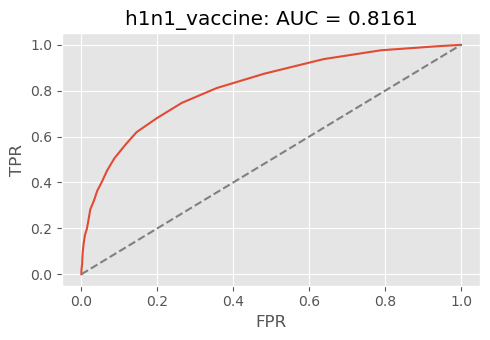

In [335]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_kn_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[4129   78]
 [ 868  267]]


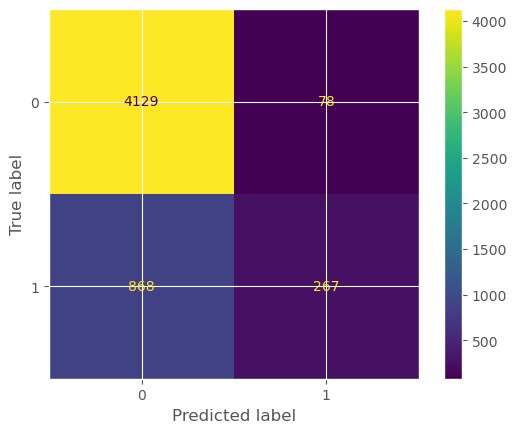

In [336]:
cm = confusion_matrix(y_eval_h1n1, preds_kn_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_kn_h1n1.classes_)
disp.plot()
plt.show()

In [337]:
params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
var_smoothing,nb,h1n1,0.02848,0.810459,4.17,0.805387,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857890,0.08,False
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857890,0.08,False
penalty,lr,h1n1,l2,0.852966,501.22,0.857890,0.08,False
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857890,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857976,0.08,True
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857976,0.08,True
penalty,lr,h1n1,l2,0.852966,501.22,0.857976,0.08,True
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857976,0.08,True
C,svm,h1n1,1,0.848509,1032.88,0.847213,90.38,False


## RandomForest

### Tuning H1N1

In [344]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

start_time = time.time()

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_h1n1_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

end_time_tuning = f"{time.time() - start_time:.2f}"
print("--- LR tuning: %s seconds ---" % end_time_tuning)

print(rf_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
--- LR tuning: 74.05 seconds ---
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)


In [345]:
print(rf_h1n1_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [347]:
coefficients = rf_h1n1_grid.best_estimator_.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
9,doctor_recc_h1n1,0.236937
16,opinion_h1n1_risk,0.142888
14,health_insurance,0.125603
15,opinion_h1n1_vacc_effective,0.120309
19,opinion_seas_risk,0.062420
10,doctor_recc_seasonal,0.046956
18,opinion_seas_vacc_effective,0.036249
13,health_worker,0.033547
0,h1n1_concern,0.017720
1,h1n1_knowledge,0.016225


<AxesSubplot:ylabel='Feature'>

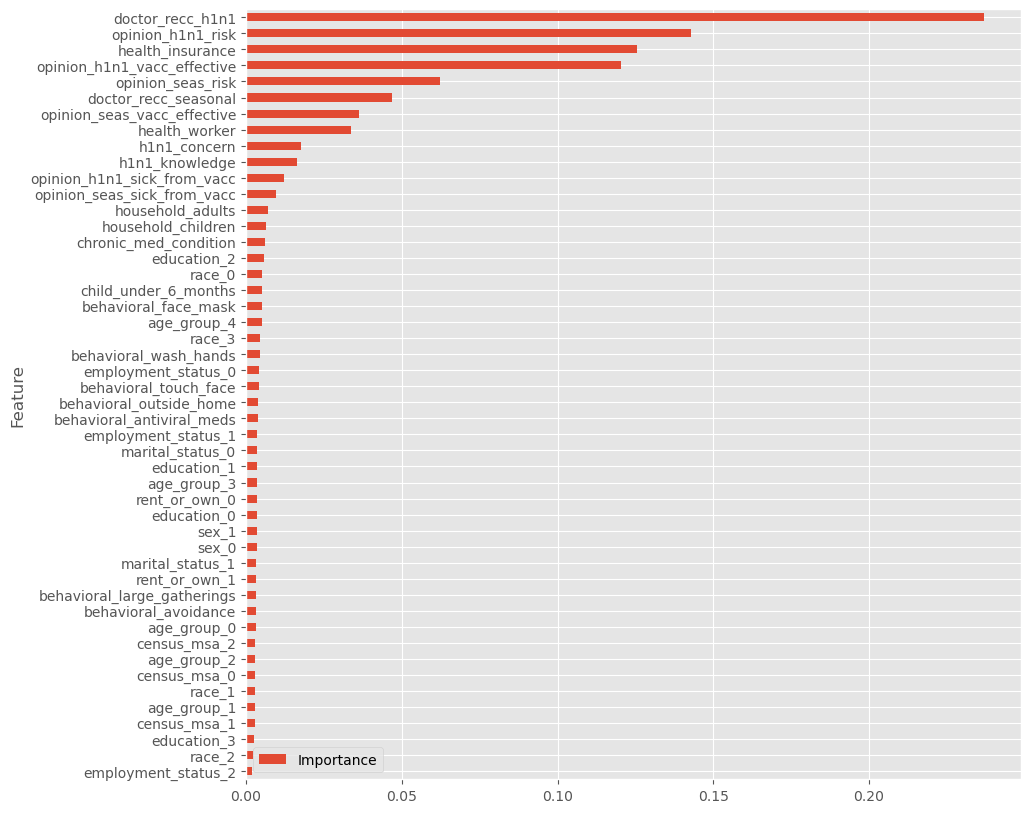

In [348]:
feature_importance.sort_values('Importance', ascending=True).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 10))

### Training H1N1

In [378]:
estimator_rf_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto',
                                           max_depth=8, random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rf_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [379]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rf_h1n1 = full_pipeline.predict_proba(X_eval)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- RF training: %s seconds ---" % end_time_training)

preds_rf_h1n1

--- RF training: 3.82 seconds ---


array([[0.9377773 , 0.0622227 ],
       [0.50187195, 0.49812805],
       [0.9104864 , 0.0895136 ],
       ...,
       [0.94842652, 0.05157348],
       [0.71438912, 0.28561088],
       [0.63994231, 0.36005769]])

In [380]:
print_metrics(y_eval_h1n1, preds_rf_h1n1[:, 1].round())

Accuracy:     0.8429
Precision:     0.7960
Recall:     0.3507

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      4207
           1       0.80      0.35      0.49      1135

    accuracy                           0.84      5342
   macro avg       0.82      0.66      0.70      5342
weighted avg       0.84      0.84      0.82      5342



In [381]:
rf_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_rf_h1n1[:, 1]):.6f}"
print(f"AUC = {rf_h1n1_auc}")

AUC = 0.857541


In [382]:
y_preds_rf_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rf_h1n1.shape)
y_preds_rf_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.062223
1215,0.498128
10540,0.089514
7407,0.188101
14697,0.206136


In [383]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'h1n1',
                                 'params':rf_h1n1_grid.best_params_,
                                 'grid score':rf_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':rf_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced':'False'})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
criterion,rf,h1n1,entropy,0.851651,74.05,0.857541,3.82,False
max_depth,rf,h1n1,8,0.851651,74.05,0.857541,3.82,False
max_features,rf,h1n1,auto,0.851651,74.05,0.857541,3.82,False
n_estimators,rf,h1n1,500,0.851651,74.05,0.857541,3.82,False


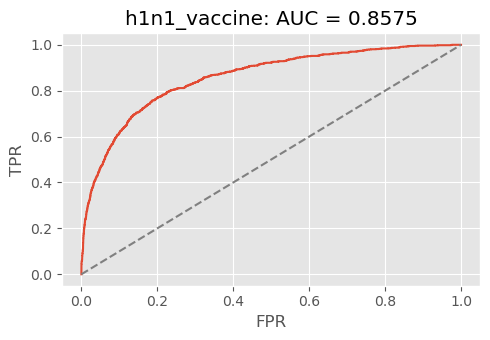

In [384]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rf_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[4105  102]
 [ 737  398]]


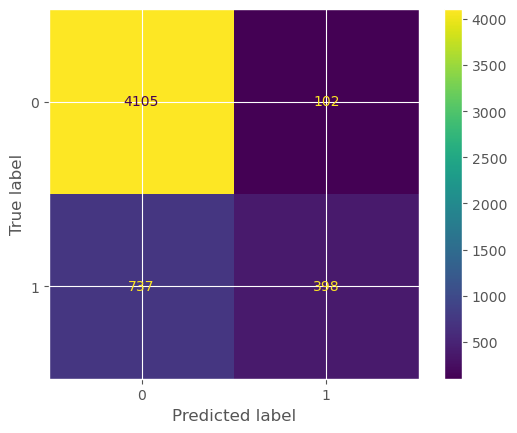

In [385]:
cm = confusion_matrix(y_eval_h1n1, preds_rf_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rf_h1n1.classes_)
disp.plot()
plt.show()

### Training H1N1 Balanced

In [386]:
estimator_rfb_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto',
                                           max_depth=8, class_weight='balanced', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rfb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator'

In [387]:
start_time = time.time()

# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rfb_h1n1 = full_pipeline.predict_proba(X_eval)

end_time_training = f"{time.time() - start_time:.2f}"
print("--- RF training: %s seconds ---" % end_time_training)

preds_rfb_h1n1

--- RF training: 3.80 seconds ---


array([[0.80941841, 0.19058159],
       [0.2469805 , 0.7530195 ],
       [0.74746079, 0.25253921],
       ...,
       [0.83491022, 0.16508978],
       [0.44259169, 0.55740831],
       [0.38553217, 0.61446783]])

In [388]:
print_metrics(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())

Accuracy:     0.8081
Precision:     0.5351
Recall:     0.7392

               precision    recall  f1-score   support

           0       0.92      0.83      0.87      4207
           1       0.54      0.74      0.62      1135

    accuracy                           0.81      5342
   macro avg       0.73      0.78      0.75      5342
weighted avg       0.84      0.81      0.82      5342



In [389]:
rfb_h1n1_auc = f"{roc_auc_score(y_eval_h1n1, preds_rfb_h1n1[:, 1]):.6f}"
print(f"AUC = {rfb_h1n1_auc}")

AUC = 0.858906


In [390]:
y_preds_rfb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rfb_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rfb_h1n1.shape)
y_preds_rfb_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.190582
1215,0.753019
10540,0.252539
7407,0.421833
14697,0.448260


In [391]:
rfb_params_result = pd.DataFrame({'estimator':'rf','target':'h1n1',
                                 'params':rf_h1n1_grid.best_params_,
                                 'grid score':rf_h1n1_grid.best_score_,
                                 'time grid (s)': end_time_tuning,
                                 'auc':rfb_h1n1_auc,
                                 'time training (s)': end_time_training,
                                 'balanced':'True'})
params_result = pd.concat([params_result, rfb_params_result])
rfb_params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
criterion,rf,h1n1,entropy,0.851651,74.05,0.858906,3.80,False
max_depth,rf,h1n1,8,0.851651,74.05,0.858906,3.80,False
max_features,rf,h1n1,auto,0.851651,74.05,0.858906,3.80,False
n_estimators,rf,h1n1,500,0.851651,74.05,0.858906,3.80,False


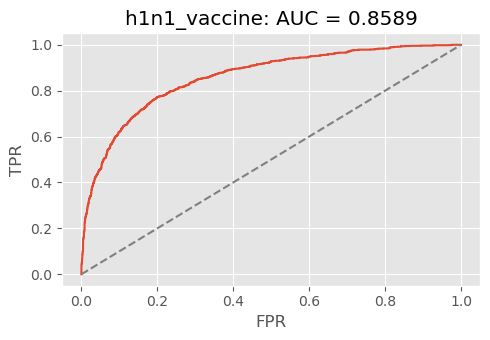

In [392]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rfb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3478  729]
 [ 296  839]]


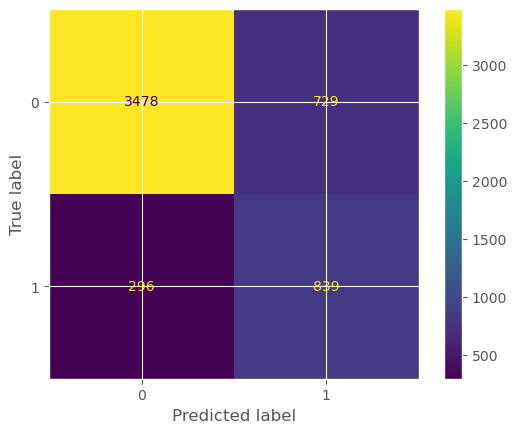

In [393]:
cm = confusion_matrix(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rfb_h1n1.classes_)
disp.plot()
plt.show()

In [394]:
params_result

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
var_smoothing,nb,h1n1,0.02848,0.810459,4.17,0.805387,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857890,0.08,False
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857890,0.08,False
penalty,lr,h1n1,l2,0.852966,501.22,0.857890,0.08,False
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857890,0.08,False
C,lr,h1n1,0.2,0.852966,501.22,0.857976,0.08,True
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857976,0.08,True
penalty,lr,h1n1,l2,0.852966,501.22,0.857976,0.08,True
solver,lr,h1n1,lbfgs,0.852966,501.22,0.857976,0.08,True
C,svm,h1n1,1,0.848509,1032.88,0.847213,90.38,False


# 3. Results

In [396]:
params_result.sort_values(by="auc", ascending=False)

,estimator,target,params,grid score,time grid (s),auc,time training (s),balanced
C,svm,h1n1,1,0.848509,1032.88,0.862752,136.46,True
gamma,svm,h1n1,0.01,0.848509,1032.88,0.862752,136.46,True
kernel,svm,h1n1,rbf,0.848509,1032.88,0.862752,136.46,True
max_features,rf,h1n1,auto,0.851651,74.05,0.858906,3.80,False
max_depth,rf,h1n1,8,0.851651,74.05,0.858906,3.80,False
criterion,rf,h1n1,entropy,0.851651,74.05,0.858906,3.80,False
n_estimators,rf,h1n1,500,0.851651,74.05,0.858906,3.80,False
penalty,lr,h1n1,l2,0.852966,501.22,0.857976,0.08,True
multi_class,lr,h1n1,multinomial,0.852966,501.22,0.857976,0.08,True
C,lr,h1n1,0.2,0.852966,501.22,0.857976,0.08,True


# 4. MultiOutputClassifier

### Algoritmo 1: Logistic Regression

In [29]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [30]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', penalty='l1')
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimators

In [31]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_lr_multi = full_pipeline.predict_proba(X_eval)
preds_lr_multi

[array([[0.9877065 , 0.0122935 ],
        [0.53869596, 0.46130404],
        [0.90067929, 0.09932071],
        ...,
        [0.97877518, 0.02122482],
        [0.80613861, 0.19386139],
        [0.62051818, 0.37948182]]),
 array([[0.58709927, 0.41290073],
        [0.24182179, 0.75817821],
        [0.84212696, 0.15787304],
        ...,
        [0.90525598, 0.09474402],
        [0.46821741, 0.53178259],
        [0.58481694, 0.41518306]])]

In [32]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_multi[0][:, 1].round())

Accuracy:     0.8463
Precision:     0.6997
Recall:     0.4846

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4207
           1       0.70      0.48      0.57      1135

    accuracy                           0.85      5342
   macro avg       0.79      0.71      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [33]:
print_metrics(y_eval_seasonal, preds_lr_multi[1][:, 1].round())

Accuracy:     0.7791
Precision:     0.7762
Recall:     0.7387

               precision    recall  f1-score   support

           0       0.78      0.81      0.80      2854
           1       0.78      0.74      0.76      2488

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [34]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_multi[0][:, 1]):.6f}")

AUC = 0.858524


In [35]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_lr_multi[1][:, 1]):.6f}")

AUC = 0.852405


In [36]:
y_preds_lr_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_multi[0][:, 1],
        "seasonal_vaccine": preds_lr_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_lr_multi.shape)
y_preds_lr_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.012293,0.412901
1215,0.461304,0.758178
10540,0.099321,0.157873
7407,0.148429,0.163226
14697,0.194854,0.333399


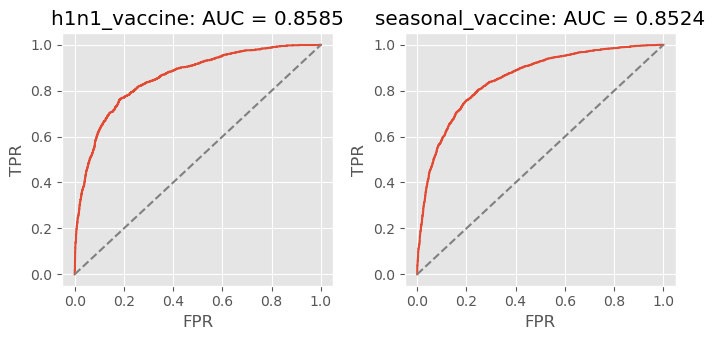

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_lr_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 2: Naive Bayes

In [166]:
estimators = MultiOutputClassifier(
    estimator=GaussianNB(var_smoothing=0.02848)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [167]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_naive_multi = full_pipeline.predict_proba(X_eval)
preds_naive_multi

[array([[9.99043482e-01, 9.56517777e-04],
        [2.12525316e-02, 9.78747468e-01],
        [9.98976668e-01, 1.02333172e-03],
        ...,
        [9.99872733e-01, 1.27267246e-04],
        [9.03577916e-01, 9.64220840e-02],
        [5.48115847e-02, 9.45188415e-01]]),
 array([[8.23823096e-01, 1.76176904e-01],
        [8.02187472e-04, 9.99197813e-01],
        [9.98345077e-01, 1.65492300e-03],
        ...,
        [9.71255262e-01, 2.87447380e-02],
        [3.29073391e-02, 9.67092661e-01],
        [3.53671748e-01, 6.46328252e-01]])]

In [168]:
print_metrics(y_eval_h1n1, preds_naive_multi[0][:, 1].round())

Accuracy:     0.7812
Precision:     0.4886
Recall:     0.6396

               precision    recall  f1-score   support

           0       0.89      0.82      0.86      4207
           1       0.49      0.64      0.55      1135

    accuracy                           0.78      5342
   macro avg       0.69      0.73      0.70      5342
weighted avg       0.81      0.78      0.79      5342



In [169]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_naive_multi[0][:, 1]):.6f}")

AUC = 0.8053866589


In [170]:
print_metrics(y_eval_seasonal, preds_naive_multi[1][:, 1].round())

Accuracy:     0.7276
Precision:     0.6938
Recall:     0.7432

               precision    recall  f1-score   support

           0       0.76      0.71      0.74      2854
           1       0.69      0.74      0.72      2488

    accuracy                           0.73      5342
   macro avg       0.73      0.73      0.73      5342
weighted avg       0.73      0.73      0.73      5342



In [171]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_naive_multi[1][:, 1]):.6f}")

AUC = 0.8019135156


In [172]:
y_preds_naive_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_naive_multi[0][:, 1],
        "seasonal_vaccine": preds_naive_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_naive_multi.shape)
y_preds_naive_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.000957,0.176177
1215,0.978747,0.999198
10540,0.001023,0.001655
7407,0.000052,0.000937
14697,0.002279,0.001749


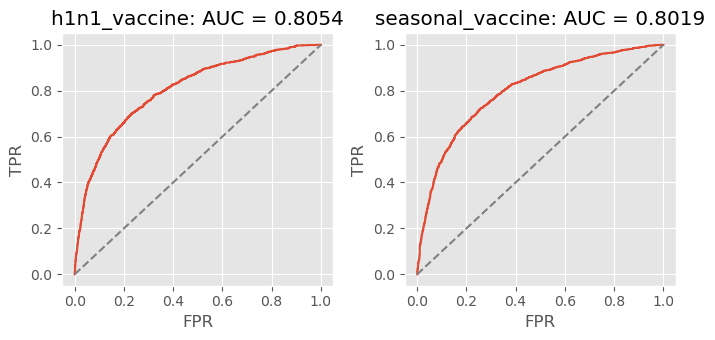

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_naive_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_naive_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 3: SVM

In [57]:
estimator_svm_multi=SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

estimators = MultiOutputClassifier(
    estimator=estimator_svm_multi
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [58]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_svm_multi = full_pipeline.predict_proba(X_eval)
preds_svm_multi

[array([[0.98274219, 0.01725781],
        [0.49472832, 0.50527168],
        [0.92832138, 0.07167862],
        ...,
        [0.96617693, 0.03382307],
        [0.78471354, 0.21528646],
        [0.5       , 0.5       ]]),
 array([[0.60290922, 0.39709078],
        [0.17645564, 0.82354436],
        [0.84894037, 0.15105963],
        ...,
        [0.92807971, 0.07192029],
        [0.5208234 , 0.4791766 ],
        [0.4738876 , 0.5261124 ]])]

In [59]:
print_metrics(y_eval_h1n1, preds_svm_multi[0][:, 1].round())

Accuracy:     0.8474
Precision:     0.6951
Recall:     0.5022

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4207
           1       0.70      0.50      0.58      1135

    accuracy                           0.85      5342
   macro avg       0.79      0.72      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [60]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_multi[0][:, 1]):.6f}")

AUC = 0.862736


In [61]:
print_metrics(y_eval_seasonal, preds_svm_multi[1][:, 1].round())

Accuracy:     0.7817
Precision:     0.7768
Recall:     0.7456

               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2854
           1       0.78      0.75      0.76      2488

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [62]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_multi[1][:, 1]):.6f}")

AUC = 0.855842


In [63]:
y_preds_svm_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_multi[0][:, 1],
        "seasonal_vaccine": preds_svm_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_svm_multi.shape)
y_preds_svm_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.017258,0.397091
1215,0.505272,0.823544
10540,0.071679,0.151060
7407,0.121488,0.206937
14697,0.130657,0.214623


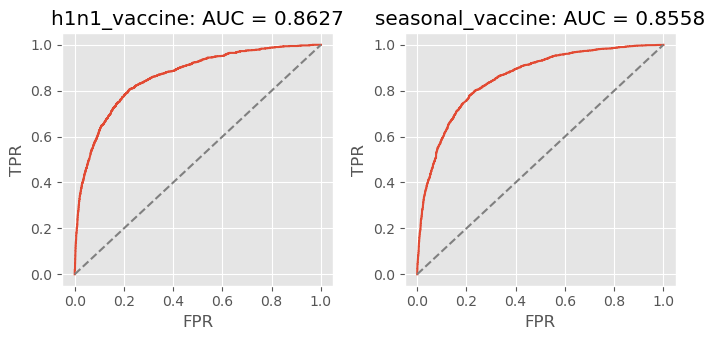

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_svm_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

[[3957  250]
 [ 565  570]]
[[2321  533]
 [ 633 1855]]


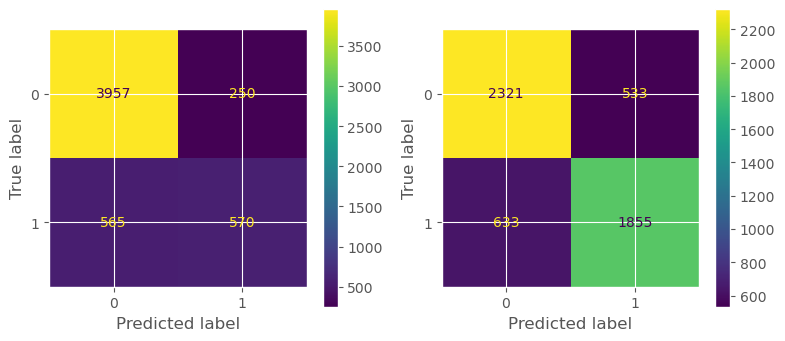

In [72]:
cm_h1n1 = confusion_matrix(y_eval_h1n1, preds_svm_multi[0][:, 1].round())
print(cm_h1n1)

cm_seasonal = confusion_matrix(y_eval_seasonal, preds_svm_multi[1][:, 1].round())
print(cm_seasonal)

disp_h1n1 = ConfusionMatrixDisplay(confusion_matrix=cm_h1n1)
disp_seasonal = ConfusionMatrixDisplay(confusion_matrix=cm_seasonal)

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

disp_h1n1.plot(ax=ax[0])
disp_seasonal.plot(ax=ax[1])

fig.tight_layout()

### Algoritmo 4: RandomForest

In [183]:
estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=RANDOM_SEED)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimators

In [184]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_rf_multi = full_pipeline.predict_proba(X_eval)
preds_rf_multi

[array([[0.9377773 , 0.0622227 ],
        [0.50187195, 0.49812805],
        [0.9104864 , 0.0895136 ],
        ...,
        [0.94842652, 0.05157348],
        [0.71438912, 0.28561088],
        [0.63994231, 0.36005769]]),
 array([[0.64936741, 0.35063259],
        [0.29563974, 0.70436026],
        [0.82538033, 0.17461967],
        ...,
        [0.76817547, 0.23182453],
        [0.3836507 , 0.6163493 ],
        [0.49005025, 0.50994975]])]

In [185]:
print_metrics(y_eval_h1n1, preds_rf_multi[0][:, 1].round())

Accuracy:     0.8429
Precision:     0.7960
Recall:     0.3507

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      4207
           1       0.80      0.35      0.49      1135

    accuracy                           0.84      5342
   macro avg       0.82      0.66      0.70      5342
weighted avg       0.84      0.84      0.82      5342



In [186]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_multi[0][:, 1]):.6f}")

AUC = 0.8575409769


In [187]:
print_metrics(y_eval_seasonal, preds_rf_multi[1][:, 1].round())

Accuracy:     0.7703
Precision:     0.7784
Recall:     0.7086

               precision    recall  f1-score   support

           0       0.76      0.82      0.79      2854
           1       0.78      0.71      0.74      2488

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



In [188]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_multi[1][:, 1]):.6f}")

AUC = 0.8495701582


In [189]:
y_preds_rf_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_multi[0][:, 1],
        "seasonal_vaccine": preds_rf_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_rf_multi.shape)
y_preds_rf_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.062223,0.350633
1215,0.498128,0.704360
10540,0.089514,0.174620
7407,0.188101,0.395614
14697,0.206136,0.390815


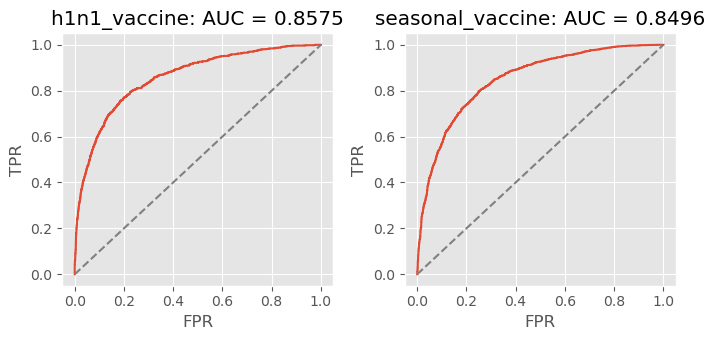

In [190]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_rf_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_rf_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()